In [2]:
import csv
import pandas as pd
import numpy as np
Wage = pd.read_csv("D:\\Mybooks\\ch7\\Wage.csv")

# 一元线性回归

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x_train = Wage['age']
y_train = Wage['wage']

plt.scatter(x_train,y_train)
plt.show()


x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
num = (x_train - x_mean).dot(y_train - y_mean)
d = (x_train - x_mean).dot(x_train - x_mean)

a = num/d
b = y_mean - a* x_mean

y_hat = a * x_train + b

plt.scatter(x_train,y_train)
plt.plot(x_train,y_hat,color="r")

# 多元线性回归

点乘法：$$Y^{(i)} =\beta_0+\beta_1X_1^ {(i)} + \beta_2X_2^ {(i)} +\dots+ \beta_pX_p^{(i)}$$
$$\beta =(\beta_0,\beta_1,\beta_2,\dots,\beta_n)^T$$

$$
X=
\left [
\begin{matrix}
1 & X_{1}^{(1)} & X_{2}^{(1)} & \cdots &  X_{n}^{(1)} \\
1 & X_{1}^{(2)} & X_{2}^{(2)} & \cdots &  X_{n}^{(2)}\\
\vdots & \vdots & \vdots&\ddots      &  \vdots       \\
1 & X_{1}^{(m)} & X_{2}^{(m)} & \cdots &  X_{n}^{(m)}\\
\end{matrix} 
\right ] \tag{4-4}
$$

进而转化为：$$\hat{Y}=X\beta $$
目标：$$min\sum_{i=1}^m(Y^{(i)}-\hat{Y}^{(i)})^2$$
转化为：$$min(y-X\beta)^T(y-X\beta)$$

过程：对$\beta$求导，令等式为0

得出：$\beta=（X^TX）^{-1}X^Ty$


In [4]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coef_ = None #系数
        self.interception_ = None #截距
        self._beta = None
    
    def fit(self, X_train, y_train):
        X = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train);
        self.interception_ = self._beta[0]
        self.coef_ = self._beta[1:]     
        return self
    def predict(self, X_predict):
        X = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X.dot(self._beta)
    def __repr__(self):
        return 'LinearRegression()'
    

# 多项式回归

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


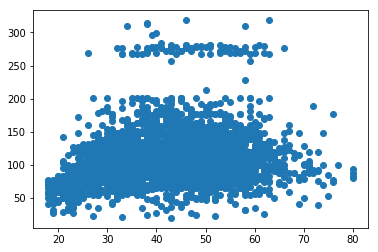

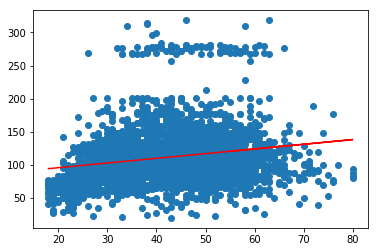

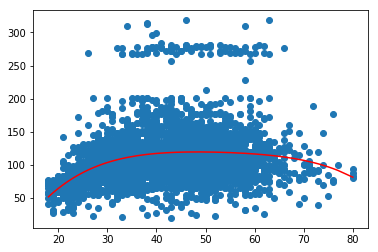

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = Wage['age']
X = x.reshape(-1,1)#整理成二维数组
y = Wage['wage']
plt.scatter(x, y)
plt.show()

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

#添加一个特征
X2 = np.hstack([X,X**2,X**3,X**4])
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [6]:
lin_reg2.coef_

array([ 2.12455205e+01, -5.63859312e-01,  6.81068771e-03, -3.20383037e-05])

In [14]:
lin_reg2.interception_

-184.15417973862844